In [145]:
print("Shivaya Namah")

Shivaya Namah


In [146]:
from langchain_cohere.chat_models import ChatCohere
from langchain_core.messages import HumanMessage, AIMessage, BaseMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from pydantic_settings import BaseSettings
from langchain_google_genai.chat_models import ChatGoogleGenerativeAI
from typing import Sequence


class Settings(BaseSettings): 

    pinecone_api_key: str 
    watsonx_apikey: str  
    watsonx_url: str
    watsonx_project_id: str
    cohere_api_key: str 
    tavily_api_key: str
    google_api_key: str

    langsmith_api_key: str
    langsmith_endpoint: str
    langsmith_tracing: bool
    langsmith_project: str

    class Config:
        env_file = ".env"
        extra = "ignore"

settings = Settings()
print("API Keys loaded succesfully.")

API Keys loaded succesfully.


In [147]:
settings.langsmith_tracing

True

In [148]:
generation_prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", 
         
            "You are a twitter techie influencer assistant tasked with writing excellent twitter posts. "
            "Generate the best twitter post possible for user's request. "
            "If the user provides critique, respond with your previous version of your attempts."         
        ),
        
        MessagesPlaceholder(variable_name = "messages") # MessagePlaceholder takes list[BaseMessage]
    ]
)
generation_prompt_template

ChatPromptTemplate(input_variables=['messages'], input_types={'messages': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[langchain_core.mes

In [149]:
generation_prompt_template.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template="You are a twitter techie influencer assistant tasked with writing excellent twitter posts. Generate the best twitter post possible for user's request. If the user provides critique, respond with your previous version of your attempts."), additional_kwargs={}),
 MessagesPlaceholder(variable_name='messages')]

In [150]:
print(generation_prompt_template.messages[0].prompt.template)

You are a twitter techie influencer assistant tasked with writing excellent twitter posts. Generate the best twitter post possible for user's request. If the user provides critique, respond with your previous version of your attempts.


In [151]:
print(generation_prompt_template.invoke({"messages": []}))

messages=[SystemMessage(content="You are a twitter techie influencer assistant tasked with writing excellent twitter posts. Generate the best twitter post possible for user's request. If the user provides critique, respond with your previous version of your attempts.", additional_kwargs={}, response_metadata={})]


In [152]:
reflection_prompt_template = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a viral twitter infulencer grading a tweet. Generate crtique and recommendations for the user's tweet. "
            "Always provide detailed recommendations, including request for length, virality, style etc."
        ),

        MessagesPlaceholder(variable_name = "messages")
    ]
)
reflection_prompt_template

ChatPromptTemplate(input_variables=['messages'], input_types={'messages': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[langchain_core.mes

## Creating chains for these two ChatPromptTemplate

In [153]:
llm = ChatCohere(cohere_api_key = settings.cohere_api_key, temperature = 0.9, max_tokens = 400)
llm

ChatCohere(client=<cohere.client.Client object at 0x0000025772773100>, async_client=<cohere.client.AsyncClient object at 0x00000257727E49D0>, model='command-a-03-2025', temperature=0.9, cohere_api_key=SecretStr('**********'))

In [154]:
generation_chain = generation_prompt_template | llm
reflection_chain = reflection_prompt_template | llm 

In [155]:
generation_chain

ChatPromptTemplate(input_variables=['messages'], input_types={'messages': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[langchain_core.mes

In [156]:
reflection_chain

ChatPromptTemplate(input_variables=['messages'], input_types={'messages': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[langchain_core.mes

In [48]:
response = generation_chain.invoke({"messages": [HumanMessage("AI Agents taking Jobs")]})

In [50]:
print(response.content)

🚨 **AI Agents Taking Jobs: The Future of Work or a Looming Crisis?** 🚨  

AI isn’t just coming—it’s here. From customer service chatbots to automated coding tools, AI agents are quietly reshaping industries. But what does this mean for jobs?  

✅ **Opportunities**:  
- **New roles**: AI trainers, ethicists, and maintainers are in demand.  
- **Efficiency**: Repetitive tasks automated, freeing humans for creative work.  
- **Innovation**: AI-driven industries could create jobs we haven’t even imagined yet.  

❌ **Challenges**:  
- **Displacement**: Millions of jobs at risk, especially in low-skill sectors.  
- **Inequality**: Those without access to AI skills could be left behind.  
- **Ethical dilemmas**: Who’s accountable when AI makes mistakes?  

💡 **The Question**: How do we prepare? Reskilling, policy changes, and ethical AI development are key.  

What’s your take? Are AI agents a threat or an opportunity? Let’s discuss! 👇 #AI #FutureOfWork #Automation #TechInnovation


In [51]:
response

AIMessage(content='🚨 **AI Agents Taking Jobs: The Future of Work or a Looming Crisis?** 🚨  \n\nAI isn’t just coming—it’s here. From customer service chatbots to automated coding tools, AI agents are quietly reshaping industries. But what does this mean for jobs?  \n\n✅ **Opportunities**:  \n- **New roles**: AI trainers, ethicists, and maintainers are in demand.  \n- **Efficiency**: Repetitive tasks automated, freeing humans for creative work.  \n- **Innovation**: AI-driven industries could create jobs we haven’t even imagined yet.  \n\n❌ **Challenges**:  \n- **Displacement**: Millions of jobs at risk, especially in low-skill sectors.  \n- **Inequality**: Those without access to AI skills could be left behind.  \n- **Ethical dilemmas**: Who’s accountable when AI makes mistakes?  \n\n💡 **The Question**: How do we prepare? Reskilling, policy changes, and ethical AI development are key.  \n\nWhat’s your take? Are AI agents a threat or an opportunity? Let’s discuss! 👇 #AI #FutureOfWork #Aut

In [53]:
human_message = HumanMessage(content="AI Agents taking Jobs")
ai_message = AIMessage(content = response.content)

In [59]:
reflection_response = reflection_chain.invoke({"messages": [human_message, ai_message]})

ValueError: The last message is not an ToolMessage or HumanMessage

The error you're getting:

```
ValueError: The last message is not a ToolMessage or HumanMessage
```

is **specific to Cohere's `ChatCohere` model via `langchain_cohere`**. It has a **strict requirement**: the last message in the list passed to the model **must be from the user (HumanMessage) or a tool**, **not** an AIMessage.

---

## 🧠 Why it failed

You're passing:

```python
reflection_chain.invoke({"messages": [human_message, ai_message]})
```

Where `ai_message` (the AI's response) is **last**, violating Cohere's requirement.

---

## ✅ Solution

**Reverse the message order** so the **last message is a HumanMessage**, as if you're prompting an LLM to critique the AI's response.

### 🔁 Corrected version:

```python
reflection_chain.invoke({
    "messages": [
        HumanMessage(content="AI Agents taking Jobs"),       # user tweet
        AIMessage(content="AI Generated tweet"),             # model output to critique
        HumanMessage(content="Can you critique the above tweet?")  # NEW human prompt
    ]
})
```

This makes it clear to Cohere (and any LLM) that you're:

* Presenting a conversation (`human → AI`)
* Then asking for a **critique request from a human**

---

## 🧠 Optional Improvement: Use named roles

If you want even more clarity, rename roles using `ChatPromptTemplate.from_messages(...)` like:

```python
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder

reflection_prompt_template = ChatPromptTemplate.from_messages([
    ("system", 
        "You are a viral Twitter influencer reviewing a tweet. Your job is to critique the AI-generated tweet and suggest improvements. Focus on virality, clarity, tone, and style."),
    MessagesPlaceholder(variable_name="messages")
])
```

---

## ✅ Final working example

```python
reflection_chain = reflection_prompt_template | llm

reflection_response = reflection_chain.invoke({
    "messages": [
        HumanMessage(content="AI Agents taking Jobs"),            # User input
        AIMessage(content="AI Generated tweet"),                  # AI response
        HumanMessage(content="Critique this tweet and improve it")  # Request for review
    ]
})
```

Now it will work perfectly — even with `ChatCohere`, `ChatOpenAI`, or IBM Granite.

Let me know if you want this critiquing step wrapped into an automatic evaluation loop!


In [60]:
reflection_prompt_template.invoke({"messages": [human_message, ai_message, HumanMessage("Critique this twwet and improve it")]}).to_messages()

[SystemMessage(content="You are a viral twitter infulencer grading a tweet. Generate crtique and recommendations for the user's tweet. Always provide detailed recommendations, including request for length, virality, style etc.", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='AI Agents taking Jobs', additional_kwargs={}, response_metadata={}),
 AIMessage(content='🚨 **AI Agents Taking Jobs: The Future of Work or a Looming Crisis?** 🚨  \n\nAI isn’t just coming—it’s here. From customer service chatbots to automated coding tools, AI agents are quietly reshaping industries. But what does this mean for jobs?  \n\n✅ **Opportunities**:  \n- **New roles**: AI trainers, ethicists, and maintainers are in demand.  \n- **Efficiency**: Repetitive tasks automated, freeing humans for creative work.  \n- **Innovation**: AI-driven industries could create jobs we haven’t even imagined yet.  \n\n❌ **Challenges**:  \n- **Displacement**: Millions of jobs at risk, especially in low-skill 

In [61]:
reflection_response = reflection_chain.invoke({"messages": [human_message, ai_message, HumanMessage("Critique this twwet and improve it")]})

In [62]:
print(reflection_response.content)

**Critique of the Tweet:**

1. **Length**: The tweet is a bit long (280 characters max is ideal for engagement). It reads more like a mini-essay, which might cause readers to lose interest halfway through.  
2. **Virality**: While it touches on a hot topic, it lacks a strong hook or polarizing statement to spark immediate engagement.  
3. **Style**: The tone is informative but somewhat dry. It could benefit from more personality or a conversational vibe to connect with the audience.  
4. **Call-to-Action (CTA)**: The CTA ("Let’s discuss!") is generic. A more specific question or prompt could encourage more replies.  
5. **Hashtags**: The hashtags are relevant but could be more targeted to increase visibility (e.g., #AITakeover or #JobAutomation).  

**Improved Version (Shorter, Punchier, More Engaging):**  

🔥 **AI is eating jobs—but is it creating more?** 🔥  
From chatbots to coding tools, AI is reshaping work.  
✅ New roles emerge.  
❌ Millions could be displaced.  
The real question

## Building Graph using LangGraph to implement Reflection Agent.

In [135]:
from langgraph.graph import END, MessageGraph, START

#### Create a node name as a CONSTANT to make our life easier.

In [136]:
REFLECT = "reflect"
GENERATE = "generate"

In [137]:
# Generate Node
def generate_node(state: Sequence[BaseMessage]):
    response = generation_chain.invoke({"messages": state})
    return HumanMessage(content = response.content)

In [138]:
# Reflect Node
def reflect_node(state: Sequence[BaseMessage]):
    
    # We get a response from LLM so obviously it would be AIMessage,
    # But for our convenience we change it as HumanMessage. 
    # Also we cannot pass AIMessage at the end in list LLM.
    # LLM expects the last message as a HumanMessage or ToolMessage.

    response = reflection_chain.invoke({"messages": state})

    return [HumanMessage(content = response.content)]


### Create a should continue method, to control the number of iterations for now.

In [139]:
def should_continue(state: Sequence[BaseMessage]):
    # For we just allow 2 iterations.
    if len(state) > 4:
        return END 
    return REFLECT

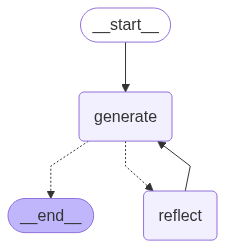

In [140]:
graph_builder = MessageGraph()
# Adding Nodes to the MessageGraph.
graph_builder.add_node(GENERATE, generate_node)
graph_builder.add_node(REFLECT, reflect_node)
graph_builder.set_entry_point(GENERATE)

# Adding Edges to the MessageGraph.
graph_builder.add_conditional_edges(GENERATE, should_continue, path_map = {REFLECT: REFLECT, END: END})
# Path Map is really important, it defines where we need to go, based on the value we get from should_continue method.
graph_builder.add_edge(REFLECT, GENERATE) 

graph = graph_builder.compile()
graph

### Execute the Graph

In [113]:
response = graph.invoke(HumanMessage("AI Agents taking over content creation."))

In [117]:
response

[HumanMessage(content='AI Agents taking over content creation.', additional_kwargs={}, response_metadata={}, id='d88e85fd-d0ab-4f29-9061-b5fada76f127'),
 HumanMessage(content='🚀 **AI Agents Are Revolutionizing Content Creation – Here’s Why It Matters**  \n\nAI isn’t just a tool anymore—it’s becoming the *creator*. From writing blogs to designing graphics, AI agents are stepping into roles once reserved for humans. But is this a threat or an opportunity?  \n\n✅ **The Upside:**  \n- **Speed & Scale:** AI can produce content in minutes, not hours.  \n- **Personalization:** Tailored content for every audience, effortlessly.  \n- **Cost-Efficiency:** Less reliance on large teams = more budget for innovation.  \n\n❓ **The Debate:**  \n- **Creativity vs. Automation:** Can AI truly replicate human ingenuity?  \n- **Ethics:** Who owns AI-generated content? How do we ensure fairness?  \n- **Jobs:** Will creators be replaced, or will they evolve alongside AI?  \n\n💡 **The Future:**  \nAI won’t re

In [119]:
print(response[-1].content)

**Final Revised Tweet:**  
*"🚨 AI isn’t just a tool—it’s the new *creator*. 🚀 **Pros:** ⚡Speed, 💸Cost, 🎯Personalization. **Cons:** ❓Creativity, ⚖️Ethics, 💼Jobs. AI writes 10x faster—but can it replace the human touch? 🤖✨ Your take? 👇 #AI #ContentCreation #FutureOfWork"*  

---

**Why This Works:**  
1. **Hook:** Bold and attention-grabbing.  
2. **Concise:** Under 240 characters for easy sharing.  
3. **Memorable:** Includes a surprising stat ("10x faster") for impact.  
4. **Emotional:** Balances excitement and concern, sparking debate.  
5. **Engaging:** Ends with a direct question to drive interaction.  
6. **Visual:** Emojis break up text and enhance readability.  

This version is optimized for virality, engagement, and clarity. Ready to hit "Tweet"! 🚀


In [116]:
for m in response:
    m.pretty_print()

================================ Human Message =================================

AI Agents taking over content creation.
================================ Human Message =================================

🚀 **AI Agents Are Revolutionizing Content Creation – Here’s Why It Matters**  

AI isn’t just a tool anymore—it’s becoming the *creator*. From writing blogs to designing graphics, AI agents are stepping into roles once reserved for humans. But is this a threat or an opportunity?  

✅ **The Upside:**  
- **Speed & Scale:** AI can produce content in minutes, not hours.  
- **Personalization:** Tailored content for every audience, effortlessly.  
- **Cost-Efficiency:** Less reliance on large teams = more budget for innovation.  

❓ **The Debate:**  
- **Creativity vs. Automation:** Can AI truly replicate human ingenuity?  
- **Ethics:** Who owns AI-generated content? How do we ensure fairness?  
- **Jobs:** Will creators be replaced, or will they evolve alongside AI?  

💡 **The Future:** 

In [157]:
response = graph.invoke(HumanMessage("Does AI is good or Bad?"))

In [144]:
print(response[-1].content)

Understood. Here is the first version of the Twitter post you reviewed.

---

### Option 1: The "Big Picture" Comparison Thread

This thread is perfect for explaining the core concepts and when to use what.

**(Tweet 1/8)**

Choosing the right AI framework can feel overwhelming. LangChain, LlamaIndex, Autogen... and now LangGraph? 🤯

Let's break down the REAL difference, and why LangGraph is a game-changer for building robust AI agents.

A thread 🧵👇

**(Tweet 2/8)**

Think of it this way:

• **Standard LangChain (`LCEL`)**: A powerful assembly line. A -> B -> C. Great for linear, predictable workflows.

• **LangGraph**: A dynamic flowchart for your agents. It's not just a line; it's a graph with loops, branches, and decision points.

The key difference? **Control over cycles and state.**

**(Tweet 3/8)**

**LangGraph vs. Core LangChain**

⛓️ **LangChain (LCEL)** is for Directed Acyclic Graphs (DAGs). Data flows one way. Perfect for simple chains: `Prompt -> LLM -> Output Parser`.

🔁 **